In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("customer_segmentation_final.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4322 non-null   float64
 1   Recency     4322 non-null   int64  
 2   Frequency   4322 non-null   int64  
 3   Monetary    4322 non-null   float64
 4   R_Score     4322 non-null   int64  
 5   F_Score     4322 non-null   int64  
 6   M_Score     4322 non-null   int64  
 7   RFM_Score   4322 non-null   int64  
 8   Segment     4322 non-null   object 
 9   Churn       4322 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 337.8+ KB


In [2]:
X = df[['Recency', 'Frequency', 'Monetary']]

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

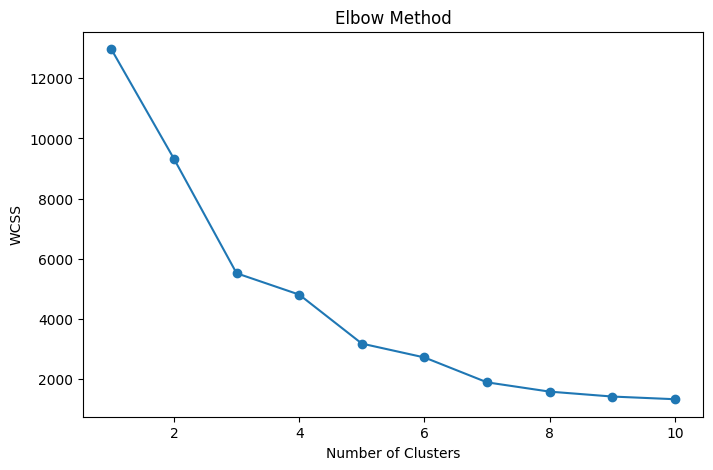

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)

df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn,Cluster
0,12347.0,2,7,4310.00,5,3,5,535,Champions,0,1
1,12348.0,75,4,1797.24,2,2,4,224,Big Spenders,0,1
2,12349.0,19,1,1757.55,4,1,4,414,Big Spenders,0,1
3,12350.0,310,1,334.40,1,1,2,112,Hibernating,0,0
4,12352.0,36,11,1545.41,3,4,4,344,Loyal Customers,0,1


In [6]:
centers = kmeans.cluster_centers_

centers_original = scaler.inverse_transform(centers)

cluster_centers = pd.DataFrame(centers_original, columns=['Recency', 'Frequency', 'Monetary'])
cluster_centers

,Recency,Frequency,Monetary
0,243.561746,1.869081,488.596872
1,39.750932,5.595031,1807.348271
2,1.333333,213.666667,67328.500000
3,6.681818,65.454545,80246.781364


In [7]:
def label_cluster(cluster):
    if cluster == 2:
        return "Champions"
    elif cluster == 3:
        return "Loyal High Value"
    elif cluster == 1:
        return "Potential Loyal"
    else:
        return "Lost Customers"

df['Cluster_Label'] = df['Cluster'].apply(label_cluster)

df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn,Cluster,Cluster_Label
0,12347.0,2,7,4310.00,5,3,5,535,Champions,0,1,Potential Loyal
1,12348.0,75,4,1797.24,2,2,4,224,Big Spenders,0,1,Potential Loyal
2,12349.0,19,1,1757.55,4,1,4,414,Big Spenders,0,1,Potential Loyal
3,12350.0,310,1,334.40,1,1,2,112,Hibernating,0,0,Lost Customers
4,12352.0,36,11,1545.41,3,4,4,344,Loyal Customers,0,1,Potential Loyal


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\avina\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


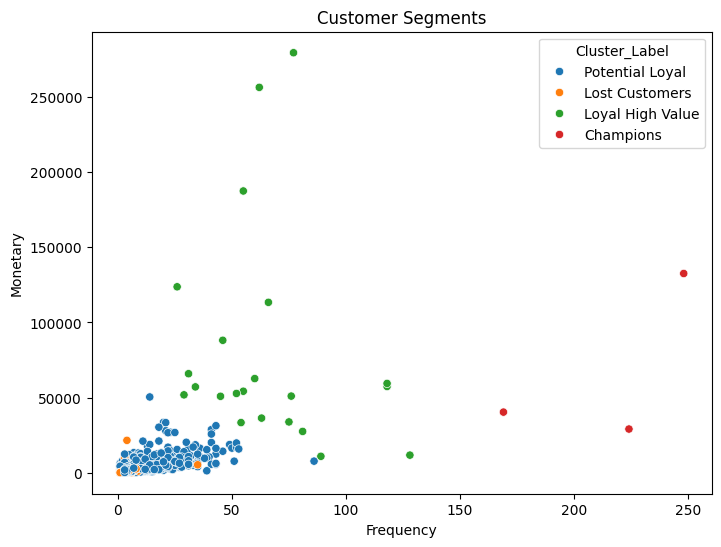

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster_Label', data=df)
plt.title("Customer Segments")
plt.show()